## This project encompasses an analysis of the dataset "200K+ Spotify Songs Light Dataset," which was recently uploaded to Kaggle. 
## The data is located at https://www.kaggle.com/datasets/devdope/200k-spotify-songs-light-dataset/data ##

#### Exploratory Data Analysis: Import libraries that may be needed for EDA, preprocessing, analysis, and visuals: ####

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA

from datetime import datetime
import time

import re
import nltk
from nltk.corpus import stopwords

import os
import glob
import json

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.style.use('ggplot')  
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
# import the dataset
df = pd.read_csv('light_spotify_dataset.csv')

In [6]:
# capitalize all column names
df.columns = [col.title() for col in df.columns]

In [8]:
# examine the first 10 rows of data
df.head(10)

Artist                   Song   Emotion  Variance Genre  Date     Key  Tempo  Loudness Explicit  Popularity  Energy  Danceability  Positiveness  Speechiness  Liveness  Acousticness  Instrumentalness
0   ABBA  She's My Kind Of Girl       joy      0.45   pop  2014   F Maj    128     -6.00       No          31      78            56            60            3        31             7                 0
1   ABBA       Andante, Andante      love      0.20   pop  1980  A# Maj    102    -10.72       No          59      36            52            38            2         7            68                 0
2   ABBA         As Good As New   sadness      0.30   pop  1979   E Maj    139     -5.70       No          50      78            85            97            3         8            20                 2
3   ABBA                   Bang       joy      0.35   pop  1975   F Maj    132     -3.00       No          52      76            50            89            3        32             3                 0
4   ABBA       Bang-A-Boomerang       joy      0.35   pop  1975   F Maj    132     -3.00       No          52      76            50            89            3        32             3                 0
5   ABBA     Burning My Bridges     anger     -0.34   pop  2013   C Maj    135     -7.00       No          34      92            40            43            4        31             9                 0
6   ABBA              Cassandra   sadness     -0.10   pop  1981   C Maj    160    -12.62       No          39      35            32            42            4         7            72                 0
7   ABBA             Chiquitita   sadness      0.11   pop  1979   A Maj     84     -8.11       No          74      55            50            37            4        31            73                 0
8   ABBA            Crazy World  surprise     -0.21   pop  1975  G# Maj    135     -9.07       No          39      60            50            55            3        29            38                 0
9   ABBA        Crying Over You     anger     -0.07   pop  2007  C# Maj    130     -6.94       No          56      72            51            50            7        28            20                 0

#### <u>Explanation of non-obvious columns and values:</u>

#### Variance: Variability measure across audio features of the song
#### Tempo: Tempo in BPM
#### Loudness: Average volume level in decibels (usually negative)
#### The columns from Popularity to Instrumentalness are scored on a 0-100 scale

In [11]:
# check the shape of the data
df.shape

(236988, 18)

In [13]:
# check for null values in each column
null_counts = df.isnull().sum()
print(null_counts)

Artist              0
Song                8
Emotion             0
Variance            0
Genre               0
Date                0
Key                 0
Tempo               0
Loudness            0
Explicit            0
Popularity          0
Energy              0
Danceability        0
Positiveness        0
Speechiness         0
Liveness            0
Acousticness        0
Instrumentalness    0
dtype: int64


#### The 8 null values in Song can safely be ignored, in light of the number of rows, which is nearly 237K. ####
#### Check data types for the columns:

In [17]:
# data types for each column
print("Basic data types for each column:")
dtypes_series = df.dtypes
print(dtypes_series)

Basic data types for each column:
Artist               object
Song                 object
Emotion              object
Variance            float64
Genre                object
Date                  int64
Key                  object
Tempo                 int64
Loudness            float64
Explicit             object
Popularity            int64
Energy                int64
Danceability          int64
Positiveness          int64
Speechiness           int64
Liveness              int64
Acousticness          int64
Instrumentalness      int64
dtype: object


#### These are the correct types. ####

___________________________________________________________________________________________________________________________________________

#### Find the number of unique values in each column. ####

In [22]:
import pandas as pd
import numpy as np

def count_unique_by_dtype(df):
    """
    Count unique values for each column grouped by data type
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze
    
    Returns:
    dict: Dictionary with data types as keys and counts of unique values as values
    """
    
    results = {}
    
    dtype_groups = {}
    for column, dtype in df.dtypes.items():
        dtype_name = str(dtype)
        if dtype_name not in dtype_groups:
            dtype_groups[dtype_name] = []
        dtype_groups[dtype_name].append(column)
    
    
    for dtype_name, columns in dtype_groups.items():
        results[dtype_name] = {}
        
        for column in columns:
            n_unique = df[column].nunique(dropna=False)
            results[dtype_name][column] = n_unique
    
    
    print("Unique Value Counts by Data Type:")
    print("================================")
    
    for dtype, columns in results.items():
        print(f"\nData Type: {dtype}")
        print("-" * (len(dtype) + 11))

        for column, count in columns.items():
            print(f"{column}: {count} unique values")
        
    
    return results

count_unique_by_dtype(df)

Unique Value Counts by Data Type:

Data Type: object
-----------------
Artist: 30607 unique values
Song: 159730 unique values
Emotion: 10 unique values
Genre: 2562 unique values
Key: 24 unique values
Explicit: 2 unique values

Data Type: float64
------------------
Variance: 38455 unique values
Loudness: 2953 unique values

Data Type: int64
----------------
Date: 93 unique values
Tempo: 167 unique values
Popularity: 100 unique values
Energy: 101 unique values
Danceability: 94 unique values
Positiveness: 100 unique values
Speechiness: 96 unique values
Liveness: 100 unique values
Acousticness: 101 unique values
Instrumentalness: 101 unique values


{'object': {'Artist': 30607,
  'Song': 159730,
  'Emotion': 10,
  'Genre': 2562,
  'Key': 24,
  'Explicit': 2},
 'float64': {'Variance': 38455, 'Loudness': 2953},
 'int64': {'Date': 93,
  'Tempo': 167,
  'Popularity': 100,
  'Energy': 101,
  'Danceability': 94,
  'Positiveness': 100,
  'Speechiness': 96,
  'Liveness': 100,
  'Acousticness': 101,
  'Instrumentalness': 101}}

_____________________________________________________________________________________________________________________________________________________

#### Create bar graphs of the categorical columns, limited to the top 20 categories for each. ####

Found 6 columns with 'object' data type:
['Artist', 'Song', 'Emotion', 'Genre', 'Key', 'Explicit']


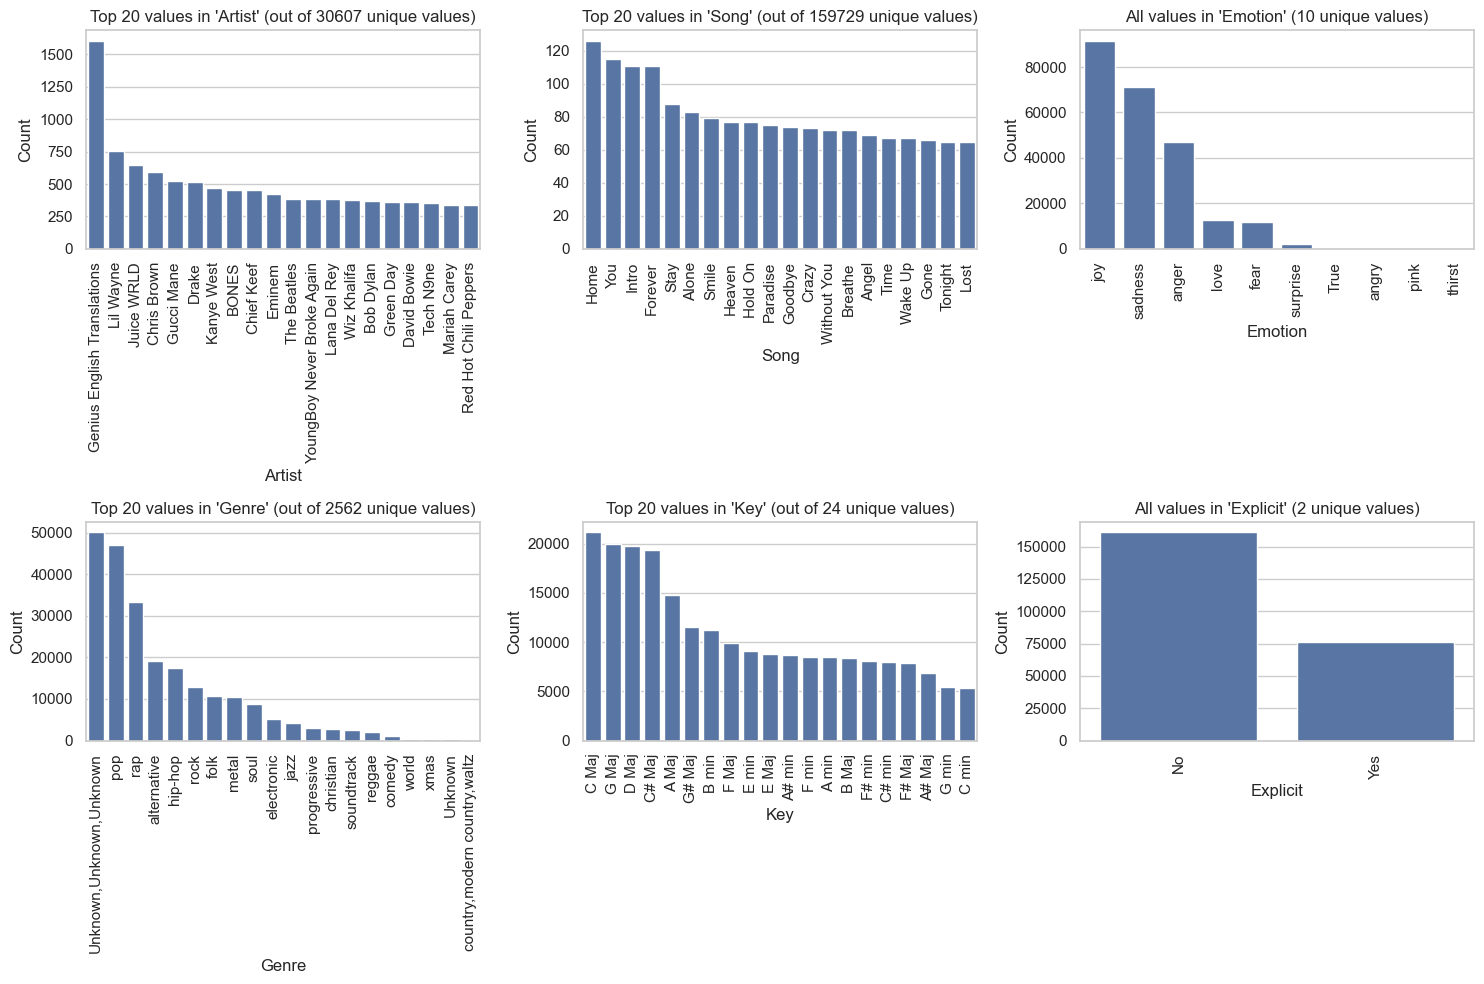

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with 'object' data type
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of object columns
print(f"Found {len(object_columns)} columns with 'object' data type:")
print(object_columns)

# Create a figure with multiple subplots
if len(object_columns) > 0:
    # Calculate grid dimensions
    n_cols = min(3, len(object_columns))
    n_rows = (len(object_columns) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, n_rows * 5))
    
    for i, column in enumerate(object_columns, 1):
        # Count the frequency of each unique value
        value_counts = df[column].value_counts().sort_values(ascending=False)
        
        # Limit to top 20 categories if there are too many
        if len(value_counts) > 20:
            value_counts = value_counts.head(20)
            title = f"Top 20 values in '{column}' (out of {df[column].nunique()} unique values)"
        else:
            title = f"All values in '{column}' ({len(value_counts)} unique values)"
        
        # Create subplot
        plt.subplot(n_rows, n_cols, i)
        
        # Create bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        
    plt.tight_layout()
    plt.show()


#### Create histograms of the numerical columns. ####

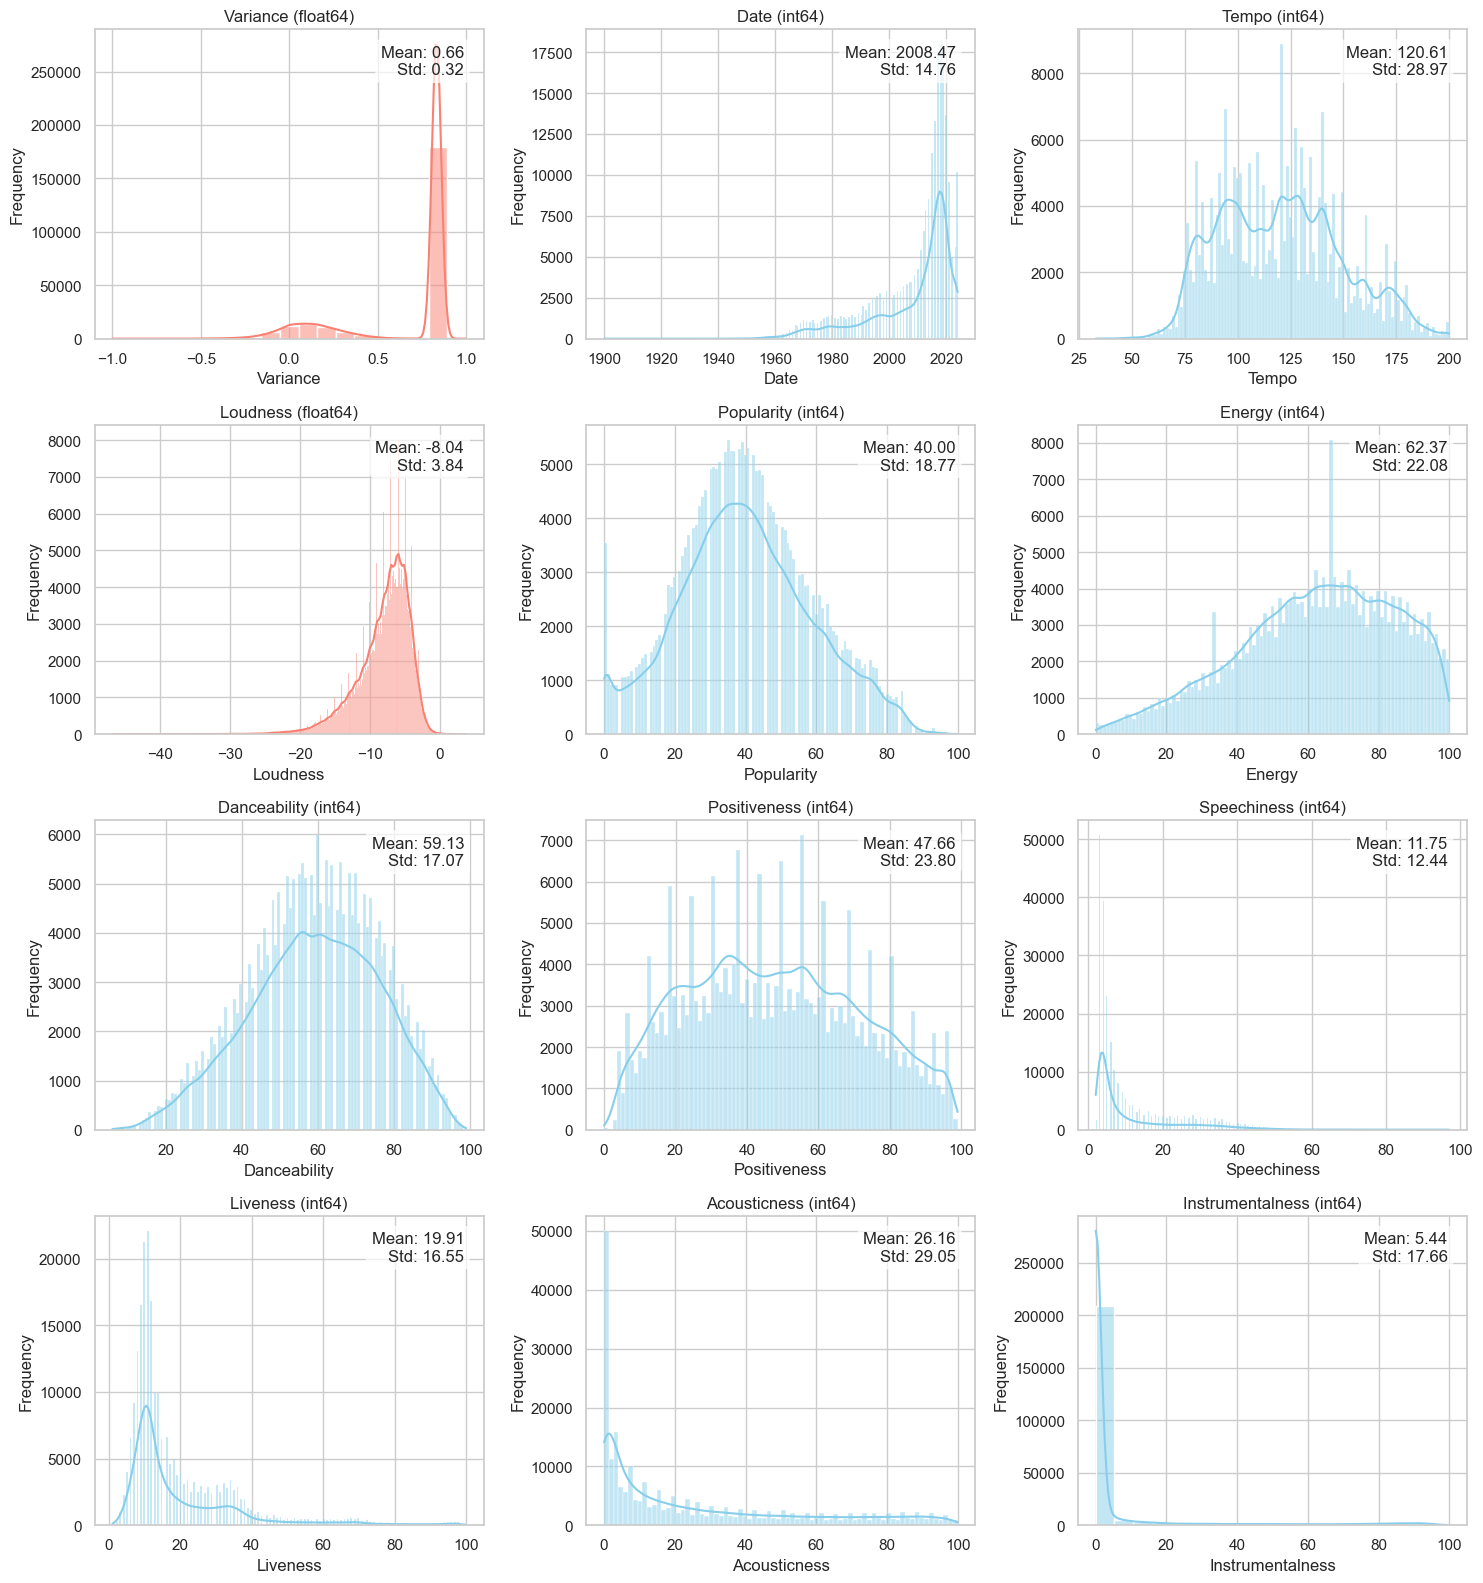

In [29]:
    # Select only int64 and float64 columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Calculate number of rows and columns for subplot grid
    n_cols = min(3, len(numeric_cols))
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    
    # Flatten axes array for easy iteration
    if n_rows * n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    # Plot histograms
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            # Determine if the column is int64 or float64
            dtype = str(df[col].dtype)
            
            # Create histogram with different colors based on data type
            if dtype == 'int64':
                sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
                axes[i].set_title(f'{col} (int64)', fontsize=12)
            else:
                sns.histplot(df[col], kde=True, ax=axes[i], color='salmon')
                axes[i].set_title(f'{col} (float64)', fontsize=12)
            
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            
            # Add statistics
            axes[i].text(0.95, 0.95, 
                        f"Mean: {df[col].mean():.2f}\nStd: {df[col].std():.2f}", 
                        transform=axes[i].transAxes, 
                        verticalalignment='top', 
                        horizontalalignment='right',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

#### Create a heatmap of the numerical columns. ####

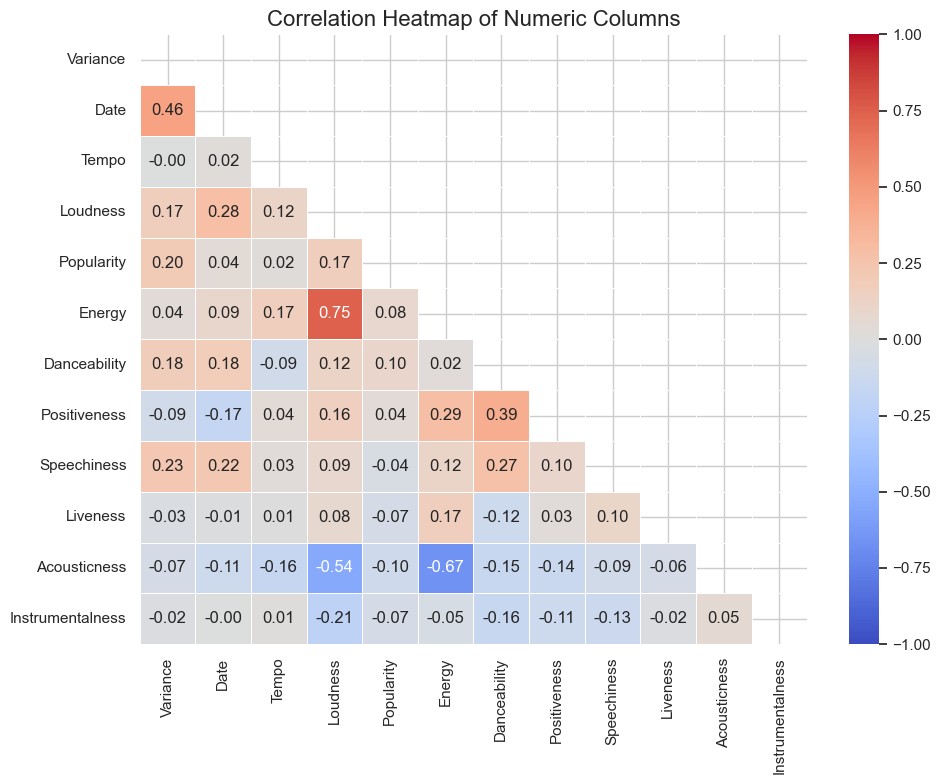

In [31]:
# Filter only numeric columns (int64 and float64)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
    
# Mask the upper triangle
mask = None
mask_upper = True  
if mask_upper:
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
figsize = (10, 8)
    
plt.figure(figsize=figsize)
    
sns.heatmap(
        data=corr_matrix,
        mask=mask,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        linewidths=0.5,
        vmin=-1,
        vmax=1
    )
    
plt.title('Correlation Heatmap of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

#### Observations on heatmap: 
#### The strongest positive correlations are between Date and Variance, Energy and Loudness, and Positiveness and Danceability. 
#### The strongest negative correlations are between Acousticness and Loudness and between Acousticness and Energy. ####

_______________________________________________________________________________________________________________________________________________________

#### Plot Popularity Over Date, Shading for Explicitness:

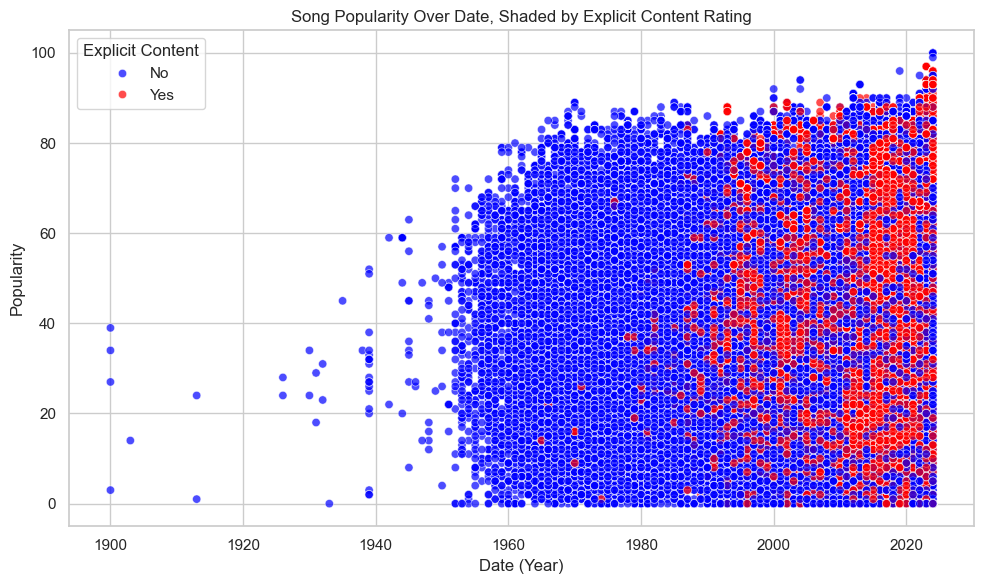

In [39]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))


scatter = sns.scatterplot(
    x='Date',
    y='Popularity',
    hue='Explicit',
    palette={'Yes': 'red', 'No': 'blue'},
    alpha=0.7,
    data=df
)


plt.xlabel('Date (Year)')
plt.ylabel('Popularity') 
plt.title('Song Popularity Over Date, Shaded by Explicit Content Rating')


plt.legend(title='Explicit Content')


plt.tight_layout()
plt.show()

#### Plot Energy Over Date, Shading for Explicitness:

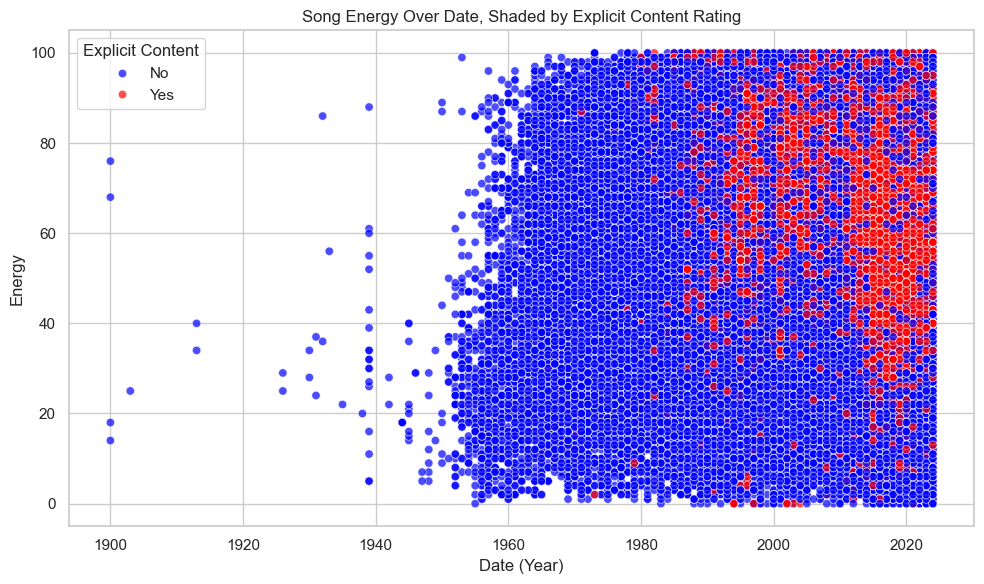

In [45]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))


scatter = sns.scatterplot(
    x='Date',
    y='Energy',
    hue='Explicit',
    palette={'Yes': 'red', 'No': 'blue'},
    alpha=0.7,
    data=df
)


plt.xlabel('Date (Year)')
plt.ylabel('Energy')
plt.title('Song Energy Over Date, Shaded by Explicit Content Rating')


plt.legend(title='Explicit Content')


plt.tight_layout()
plt.show()

#### Plot Loudness Over Energy, Shading for Explicitness:

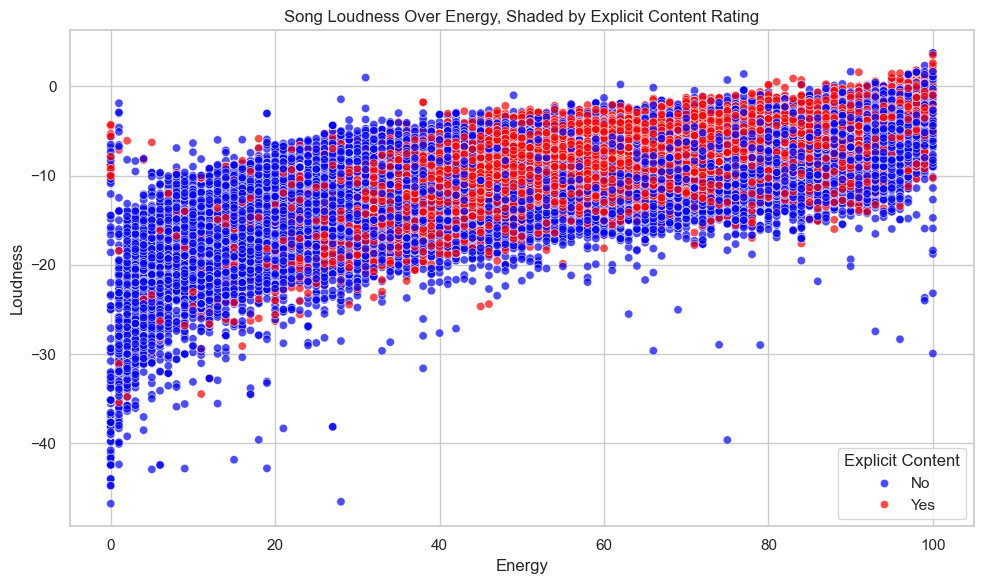

In [47]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))


scatter = sns.scatterplot(
    x='Energy',
    y='Loudness',
    hue='Explicit',
    palette={'Yes': 'red', 'No': 'blue'},
    alpha=0.7,
    data=df
)


plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Song Loudness Over Energy, Shaded by Explicit Content Rating')


plt.legend(title='Explicit Content')


plt.tight_layout()
plt.show()

#### Show all pairwise plots of the columns:

Original data: 236988 rows
Downsampled to: 1000 rows
Each dot represents approximately 237.0 values


<Figure size 1200x1000 with 0 Axes>

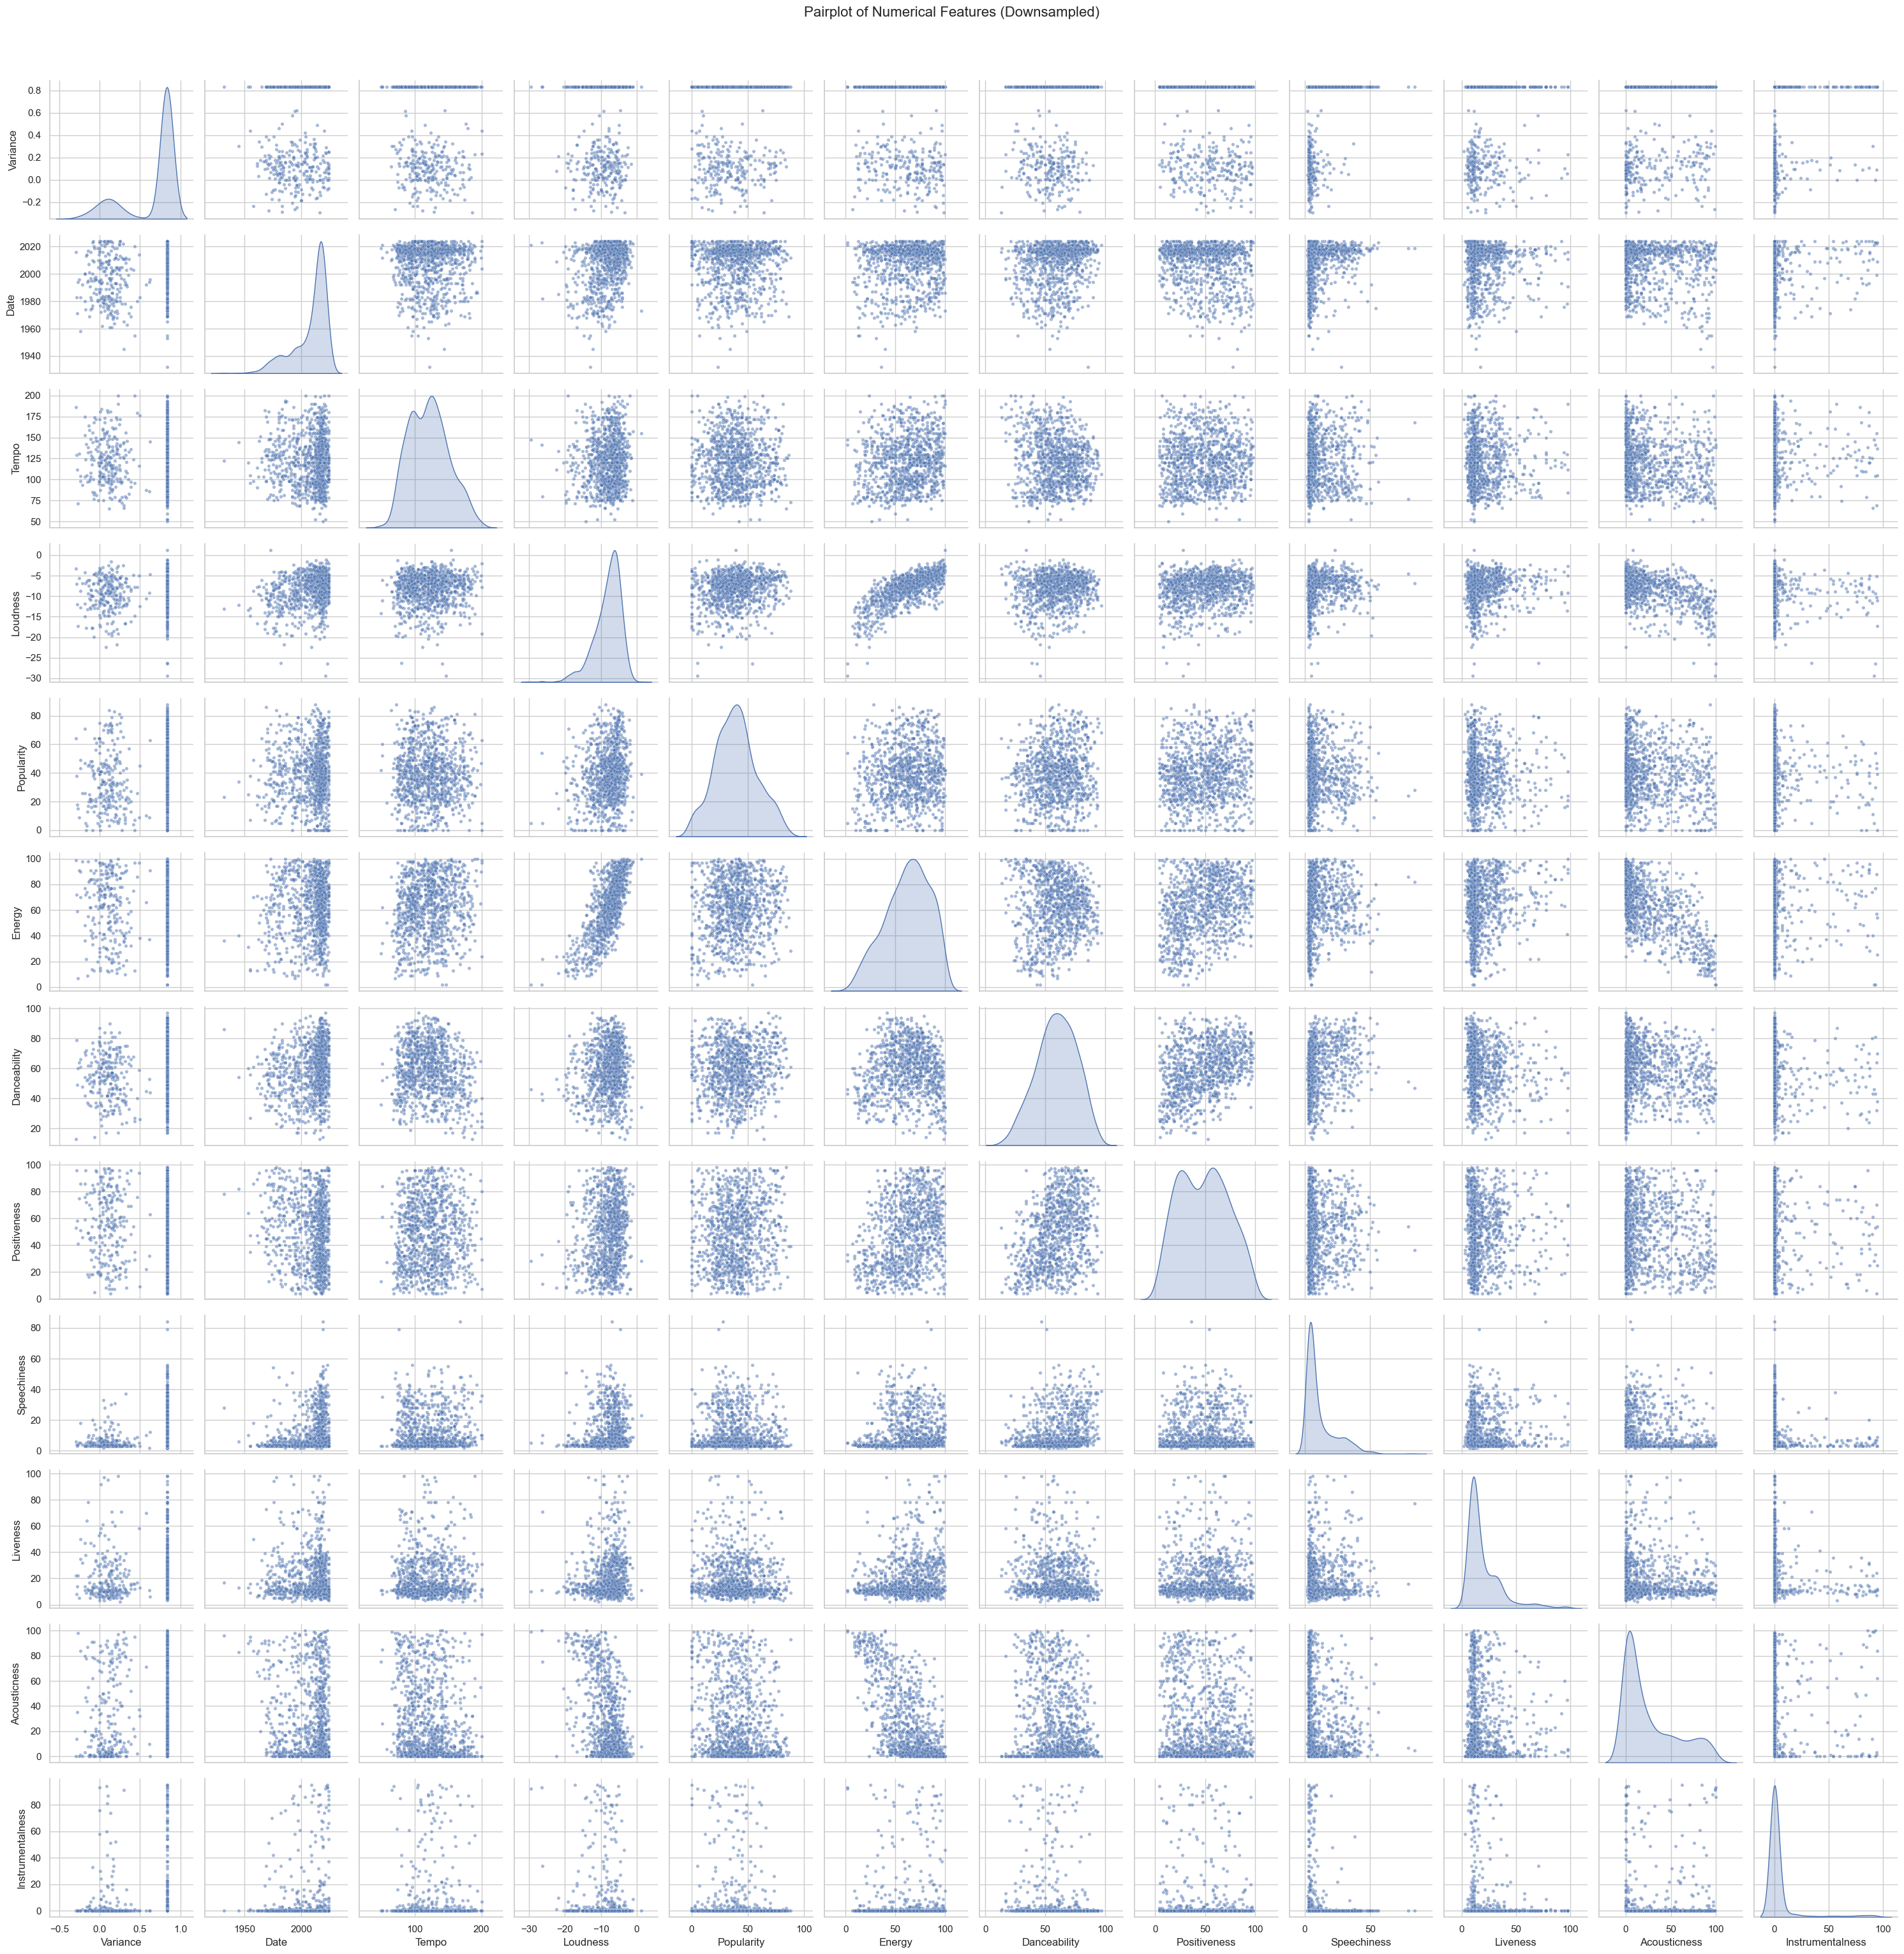

In [50]:
def downsample_for_pairplot(df, sample_size=1000):

    # Select numerical columns
    numeric_df = df.select_dtypes(include=[np.number])
    

    total_rows = len(numeric_df)
    
    # Calculate the sampling fraction to get approximately one dot per sample_size values
    fraction = sample_size / total_rows
    
    # Downsample the data
    downsampled_df = numeric_df.sample(frac=fraction, random_state=42)
    
    print(f"Original data: {total_rows} rows")
    print(f"Downsampled to: {len(downsampled_df)} rows")
    print(f"Each dot represents approximately {total_rows/len(downsampled_df):.1f} values")
    
    return downsampled_df


downsampled_data = downsample_for_pairplot(df, sample_size=1000)


plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(
    downsampled_data,
    diag_kind='kde',  
    plot_kws={'alpha': 0.5, 's': 15}, 
    height=2.5  
)


plt.suptitle('Pairplot of Numerical Features (Downsampled)', y=1.02, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

#### These scatterplots (though small) make some relationships from the heatmap observable. 
#### For instance, there is the strong positive correlation between Energy and Loudness. 
#### Also, the relationship between Danceability and Tempo, while not linear, appears
#### to have a parabolic shape, as does that between Danceability and Energy.
#### ______________________________________________________________________________________
#### Let's look at a plot of Danceability over Tempo.

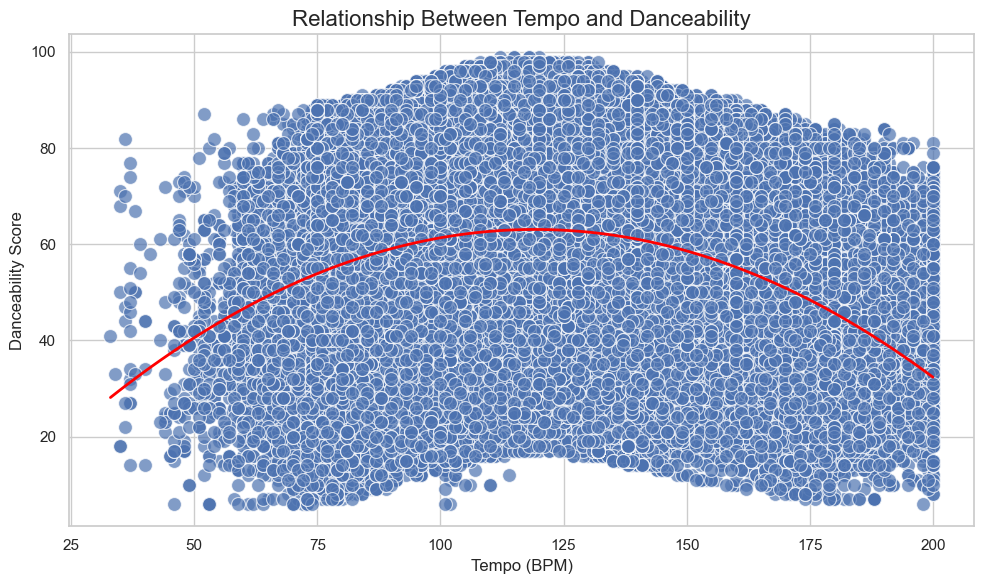

Parabola equation: y = -0.004705x² + 1.121639x + -3.761802


In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


scatter = sns.scatterplot(
    x='Tempo', 
    y='Danceability', 
    data=df,
    alpha=0.7,
    s=100  # Size of points
)


plt.title('Relationship Between Tempo and Danceability', fontsize=16)
plt.xlabel('Tempo (BPM)', fontsize=12)
plt.ylabel('Danceability Score', fontsize=12)

# Fit a parabola
x = df['Tempo']
y = df['Danceability']
coefficients = np.polyfit(x, y, 2)  # 2 for quadratic/parabolic fit
polynomial = np.poly1d(coefficients)

# Generate x values for the curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = polynomial(x_curve)

# Plot the parabolic trend line
plt.plot(x_curve, y_curve, color='red', linewidth=2)


plt.tight_layout()
plt.show()

# Print the equation of the parabola
print(f"Parabola equation: y = {coefficients[0]:.6f}x² + {coefficients[1]:.6f}x + {coefficients[2]:.6f}")

#### Note that the vertex of the parabolic trend curve occurs at approximately Tempo = x = -1.122/(2*-0.0047) = 119.36. 
#### This is very close to the well-known 120 BPM tempo of songs in the disco genre, for example.
#### _____________________________________________________________________________________________________________________________________________
#### Let's look at a plot of Danceability over Energy:

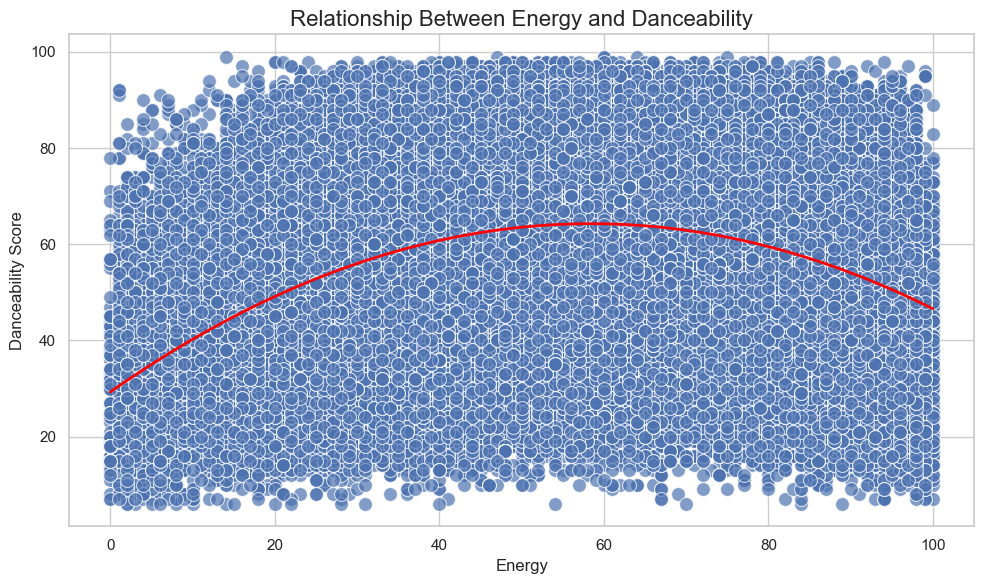

Parabola equation: y = -0.010244x² + 1.197292x + 29.297030


In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


scatter = sns.scatterplot(
    x='Energy', 
    y='Danceability', 
    data=df,
    alpha=0.7,
    s=100  # Size of points
)


plt.title('Relationship Between Energy and Danceability', fontsize=16)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Danceability Score', fontsize=12)

# Fit a parabola
x = df['Energy']
y = df['Danceability']
coefficients = np.polyfit(x, y, 2)  # 2 for quadratic/parabolic fit
polynomial = np.poly1d(coefficients)

# Generate x values for the curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = polynomial(x_curve)

# Plot the parabolic trend line
plt.plot(x_curve, y_curve, color='red', linewidth=2)


plt.tight_layout()
plt.show()

# Print the equation of the parabola
print(f"Parabola equation: y = {coefficients[0]:.6f}x² + {coefficients[1]:.6f}x + {coefficients[2]:.6f}")

#### Here, the vertex of the trend curve occurs at Energy = x = -1.197/(2*-0.0102) = 58.7, but the interpretation of
#### this is unclear. It is, though, nearly 60, which is half of the 120 BPM mentioned above.
#### ________________________________________________________________________________________________________________________________________________

#### A plot of Tempo Over Date shows no correlation.

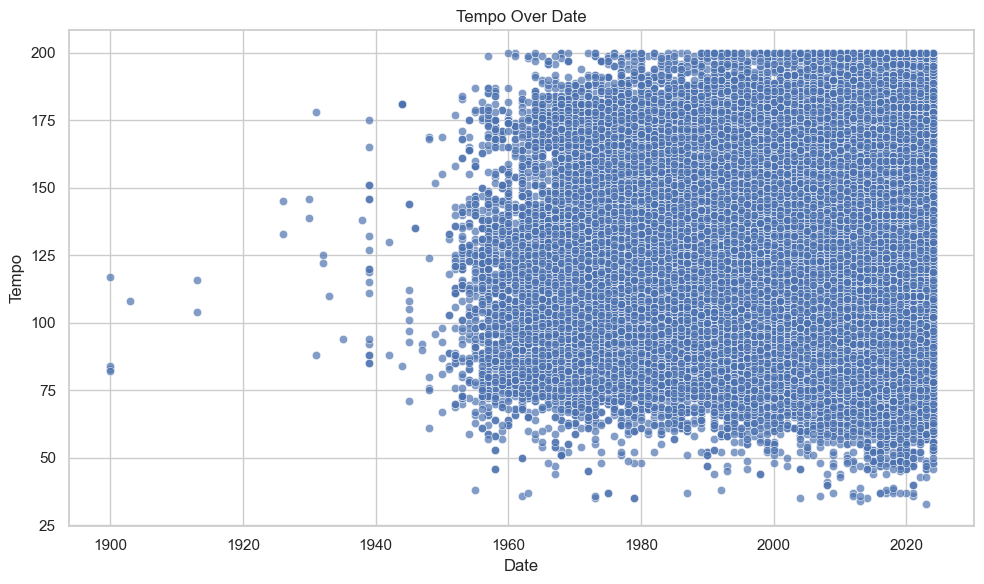

In [65]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))


scatter = sns.scatterplot(
    x='Date',
    y='Tempo',
    alpha=0.7,
    data=df
)


plt.xlabel('Date')
plt.ylabel('Tempo')
plt.title('Tempo Over Date')

plt.tight_layout()
plt.show()

#### Emotion seems pretty evenly distributed over tempo.

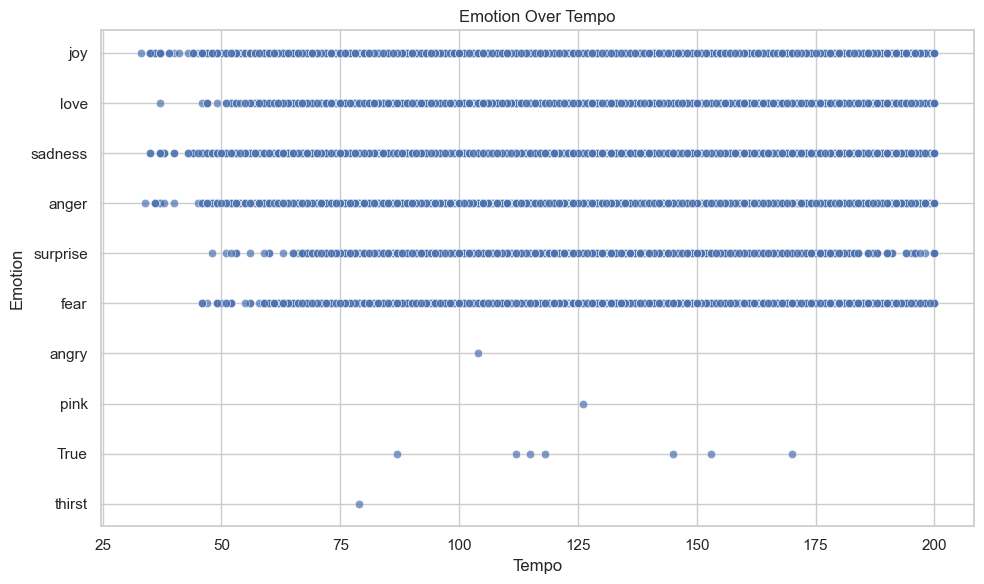

In [69]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))


scatter = sns.scatterplot(
    x='Tempo',
    y='Emotion',
    alpha=0.7,
    data=df
)


plt.xlabel('Tempo')
plt.ylabel('Emotion')
plt.title('Emotion Over Tempo')

plt.tight_layout()
plt.show()

#### __________________________________________________________________________________________________________________________________________________

## Let's begin looking at some more complex analyses of the dataset.

### Here we look at Loudness as a predictor of Explicitness using several models:

Logistic Regression Accuracy: 0.6798599097008312
              precision    recall  f1-score   support

          No       0.68      1.00      0.81     32206
         Yes       0.56      0.01      0.01     15192

    accuracy                           0.68     47398
   macro avg       0.62      0.50      0.41     47398
weighted avg       0.64      0.68      0.55     47398


Decision Tree Accuracy: 0.6809781003417865
              precision    recall  f1-score   support

          No       0.69      0.98      0.81     32206
         Yes       0.52      0.05      0.09     15192

    accuracy                           0.68     47398
   macro avg       0.61      0.51      0.45     47398
weighted avg       0.63      0.68      0.58     47398


Random Forest Accuracy: 0.6808937085952994
              precision    recall  f1-score   support

          No       0.69      0.98      0.81     32206
         Yes       0.52      0.05      0.09     15192

    accuracy                           0.68  

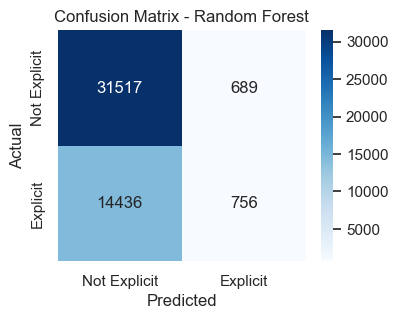

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extract features and target
X = df[['Loudness']]  
y = df['Explicit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Decision trees don't require scaling
dt_pred = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Visualize confusion matrix for the best model (assuming Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Explicit', 'Explicit'],
            yticklabels=['Not Explicit', 'Explicit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#### Decision Tree and Random Forest have accuracy scores of 0.68.
#### ____________________________________________________________________________

### Here we look at Date as a predictor of Explicitness using several models:

In [82]:
# Reset the df
df = pd.read_csv('light_spotify_dataset.csv')
df.columns = [col.title() for col in df.columns]

Logistic Regression Accuracy: 0.651630870500865
              precision    recall  f1-score   support

          No       0.68      0.93      0.78     32206
         Yes       0.30      0.06      0.10     15192

    accuracy                           0.65     47398
   macro avg       0.49      0.50      0.44     47398
weighted avg       0.56      0.65      0.57     47398


Decision Tree Accuracy: 0.6831933836870754
              precision    recall  f1-score   support

          No       0.69      0.96      0.80     32206
         Yes       0.53      0.10      0.16     15192

    accuracy                           0.68     47398
   macro avg       0.61      0.53      0.48     47398
weighted avg       0.64      0.68      0.60     47398


Random Forest Accuracy: 0.6831933836870754
              precision    recall  f1-score   support

          No       0.69      0.96      0.80     32206
         Yes       0.53      0.10      0.16     15192

    accuracy                           0.68   

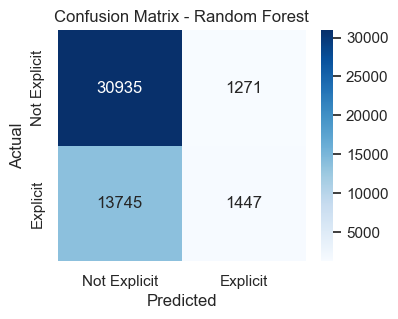

In [84]:
# Extract features and target
X = df[['Date']] 
y = df['Explicit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  
dt_pred = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Visualize confusion matrix for the best model (assuming Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Explicit', 'Explicit'],
            yticklabels=['Not Explicit', 'Explicit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#### Again, Decision Tree and Random Forest have accuracy scores of 0.68.
#### ______________________________________________________________________

### Let's try using four features, Date, Loudness, Popularity, and Energy as predictors of Explicitness.

In [89]:
# Reset the df
df = pd.read_csv('light_spotify_dataset.csv')
df.columns = [col.title() for col in df.columns]

Logistic Regression Accuracy: 0.6645217097767838
              precision    recall  f1-score   support

          No       0.69      0.91      0.79     32206
         Yes       0.43      0.14      0.21     15192

    accuracy                           0.66     47398
   macro avg       0.56      0.53      0.50     47398
weighted avg       0.61      0.66      0.60     47398


Decision Tree Accuracy: 0.7290181020296215
              precision    recall  f1-score   support

          No       0.80      0.80      0.80     32206
         Yes       0.58      0.59      0.58     15192

    accuracy                           0.73     47398
   macro avg       0.69      0.69      0.69     47398
weighted avg       0.73      0.73      0.73     47398


Random Forest Accuracy: 0.7663403519135829
              precision    recall  f1-score   support

          No       0.81      0.86      0.83     32206
         Yes       0.66      0.56      0.61     15192

    accuracy                           0.77  

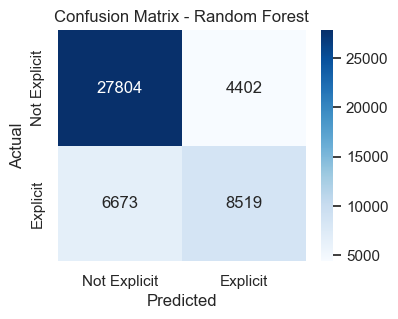

In [91]:
# Extract features and target
X = df[['Date', 'Loudness', 'Popularity', 'Energy']]  # Use double brackets to create a DataFrame
y = df['Explicit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features (important for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Decision trees don't require scaling
dt_pred = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Visualize confusion matrix for the best model (assuming Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Explicit', 'Explicit'],
            yticklabels=['Not Explicit', 'Explicit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#### Now the accuracy for the Random Forest model has risen to 0.77.
#### _______________________________________________________________________

In [94]:
# Reset the df
df = pd.read_csv('light_spotify_dataset.csv')
df.columns = [col.title() for col in df.columns]

### This is a hypothesis test to see if songs with dates before 2008 are less likely to be explicit than songs before 2008.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\proportion.py:1004: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\proportion.py:1020: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)
posx and posy should be finite values
posx and posy should be finite values


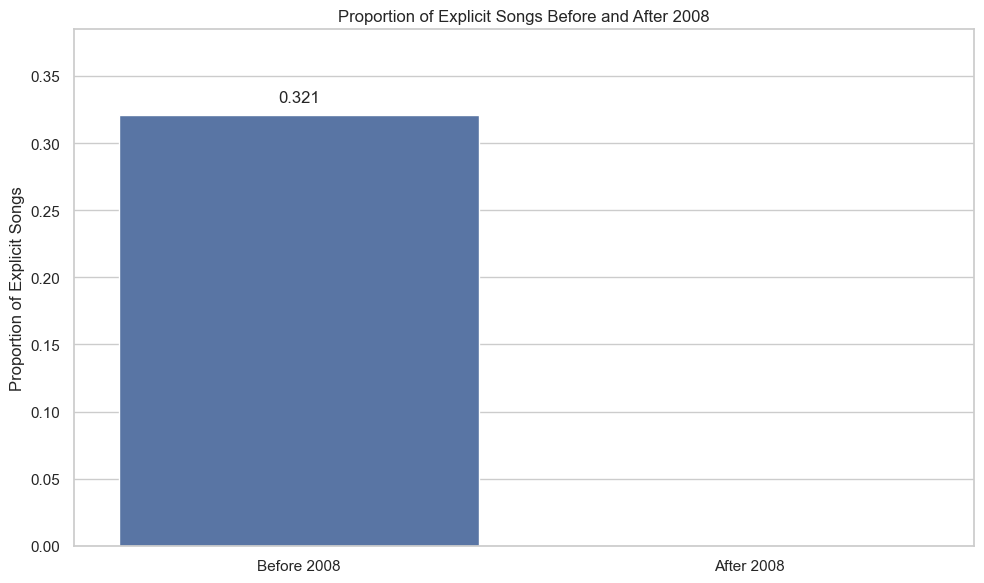

Proportion before 2008: 0.321
Proportion after 2008: nan
p-value: nan
Conclusion: Fail to reject H0


In [133]:
def test_explicit_proportion_by_year(data, year_threshold=2008):
    # Ensure date is datetime
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    
    # Normalize Explicit column
    data['Explicit'] = data['Explicit'].astype(str).str.strip().str.lower()
    
    # Create a column to identify songs before/after threshold
    data['Before_Threshold'] = data['Date'].dt.year < year_threshold
    
    # Group data
    before_group = data[data['Before_Threshold']]
    after_group = data[~data['Before_Threshold']]
    
    # Calculate proportions
    explicit_before = (before_group['Explicit'] == 'yes').mean()
    explicit_after = (after_group['Explicit'] == 'yes').mean()
    
    # Sample sizes
    n_before = len(before_group)
    n_after = len(after_group)
    
    # Perform the proportion test
    count_before = (before_group['Explicit'] == 'yes').sum()
    count_after = (after_group['Explicit'] == 'yes').sum()
    
    stat, p_value = proportions_ztest(
        [count_before, count_after], 
        [n_before, n_after],
        alternative='smaller'
    )
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    sns.barplot(x=['Before 2008', 'After 2008'], y=[explicit_before, explicit_after])
    plt.title('Proportion of Explicit Songs Before and After 2008')
    plt.ylabel('Proportion of Explicit Songs')
    plt.ylim(0, max(explicit_before, explicit_after) * 1.2)
    
    for i, prop in enumerate([explicit_before, explicit_after]):
        plt.text(i, prop + 0.01, f'{prop:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'explicit_before': explicit_before,
        'explicit_after': explicit_after,
        'n_before': n_before,
        'n_after': n_after,
        'z_statistic': stat,
        'p_value': p_value,
        'significant': p_value < 0.05,
        'conclusion': "Reject H0" if p_value < 0.05 else "Fail to reject H0"
    }

results = test_explicit_proportion_by_year(df)
print(f"Proportion before 2008: {results['explicit_before']:.3f}")
print(f"Proportion after 2008: {results['explicit_after']:.3f}")
print(f"p-value: {results['p_value']:.4f}")
print(f"Conclusion: {results['conclusion']}")